In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pydot
import graphviz
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

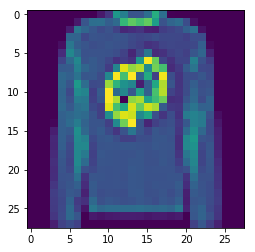

(60000, 28, 28)


In [4]:
image_shape = (28, 28, 1)
input_shape=[None,28,28,1]

#Hyper parameters
batch_size = 128
num_classes = 10
epochs = 12

image = X_train[123, :].reshape((28, 28))

plt.imshow(image)
plt.show()

print(X_train.shape)

In [5]:
# scale data to the range of [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


# Further spliting training data into train / validation sets (# put 10000 into validation set and keep remaining 50,000 for train)
(X_train, X_cv) = X_train[10000:], X_train[:10000] 
(y_train, y_cv) = y_train[10000:], y_train[:10000]



In [6]:
# Reshape input data to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_cv = X_cv.reshape(X_cv.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_cv = tf.keras.utils.to_categorical(y_cv,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

#Print the sizes and shapes
print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_cv shape: {}'.format(X_cv.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
print('y_cv shape: {}'.format(y_cv.shape))

x_train shape: (50000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_cv shape: (10000, 28, 28, 1)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
y_cv shape: (10000, 10)


In [7]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_cv, y_cv))
#model.fit(X_train, y_train, validation_data=(X_cv, y_cv),, batch_size=128, epochs=12, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 216s 4ms/step - loss: 0.5211 - acc: 0.8118 - val_loss: 0.3460 - val_acc: 0.8743
Epoch 2/10
50000/50000 [==============================] - 214s 4ms/step - loss: 0.3817 - acc: 0.8603 - val_loss: 0.3143 - val_acc: 0.8880
Epoch 3/10
50000/50000 [==============================] - 219s 4ms/step - loss: 0.3540 - acc: 0.8699 - val_loss: 0.3061 - val_acc: 0.8882
Epoch 4/10
50000/50000 [==============================] - 214s 4ms/step - loss: 0.3371 - acc: 0.8757 - val_loss: 0.2727 - val_acc: 0.9019
Epoch 5/10
50000/50000 [==============================] - 214s 4ms/step - loss: 0.3213 - acc: 0.8801 - val_loss: 0.2588 - val_acc: 0.9030
Epoch 6/10
50000/50000 [==============================] - 214s 4ms/step - loss: 0.3136 - acc: 0.8836 - val_loss: 0.2825 - val_acc: 0.8928
Epoch 7/10
50000/50000 [==============================] - 212s 4ms/step - loss: 0.3094 - acc: 0.8848 - val_loss: 0.2678 - 

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29135435262322423
Test accuracy: 0.9026


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [35]:
print('0 - T-shirt/top \n1 - Trouser\n2 - Pullover\n3 - Dress\n4 - Coat\n5 - Sandal\n6 - Shirt\n7 - Sneaker\n8 - Bag\n9 - Ankle boot')
 

0 - T-shirt/top 
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandal
6 - Shirt
7 - Sneaker
8 - Bag
9 - Ankle boot


In [36]:

predictions = model.predict_classes(X_test)
import random

class_labels=np.argmax(y_test, axis=1)


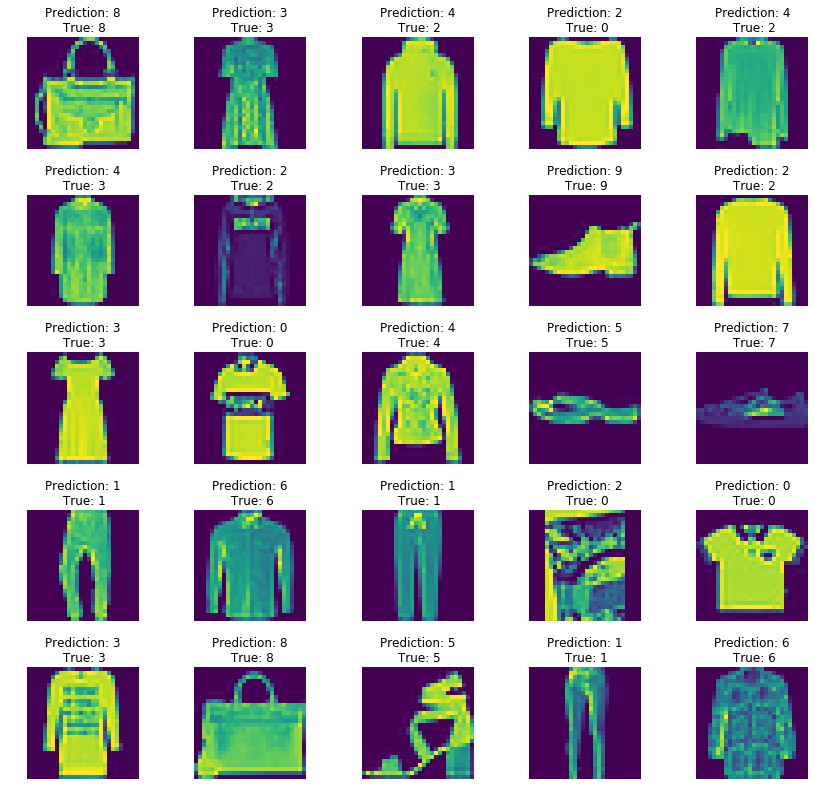

In [38]:
fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1d (?)
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(X_test[randnum + i].reshape(28, 28))
    axes[i].set_title('Prediction: %d\n True: %d' %
                      (predictions[randnum + i], class_labels[randnum + i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
